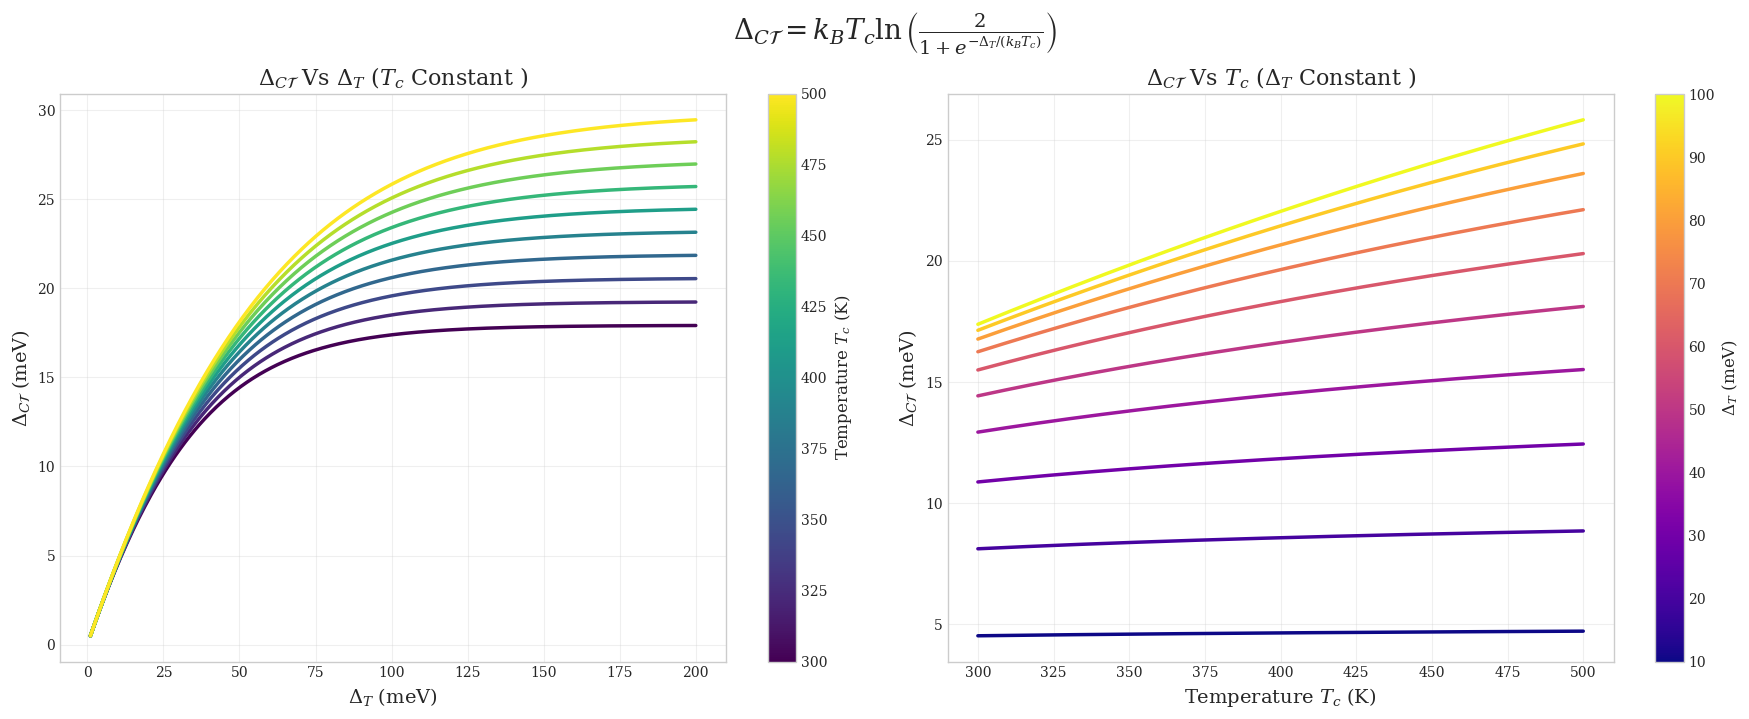

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Boltzmann constant in meV/K (converted from eV/K)
kB = 0.08617333262145  # meV/K (8.617333262145e-5 eV/K * 1000)

def delta_ct(T_c, delta_T):
    """
    Calculate Δ_C𝒯 = k_B T_c * ln(2 / (1 + exp(-Δ_T/(k_B T_c)))
    
    Parameters:
    T_c (float or array): Temperature in Kelvin
    delta_T (float or array): Energy difference in meV
    
    Returns:
    float or array: Δ_C𝒯 in meV
    """
    exponent = -delta_T / (kB * T_c)
    return kB * T_c * np.log(2 / (1 + np.exp(exponent)))

# Configure plot aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# =================================================================
# Plot 1: Fixed T_c values (vary Δ_T)
# =================================================================
# Converted range: 0.001-0.2 eV → 1-200 meV
delta_T_range = np.linspace(1, 200, 500)  # Δ_T in meV
T_c_values = np.linspace(300, 500, 10)    # T_c in K

# Create colormap for the 10 different temperatures
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(T_c_values)))

for i, T_c in enumerate(T_c_values):
    delta_ct_values = delta_ct(T_c, delta_T_range)  # Already in meV
    ax1.plot(delta_T_range, delta_ct_values, lw=2.5, 
             color=colors[i], label=f'T_c = {T_c:.0f} K')

ax1.set_title(r'$\Delta_{C\mathcal{T}}$ Vs $\Delta_T$ ($T_c$ Constant )', fontsize=16)
ax1.set_xlabel(r'$\Delta_T$ (meV)', fontsize=14)
ax1.set_ylabel(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add colorbar for temperature
sm = plt.cm.ScalarMappable(cmap=cmap, 
                          norm=plt.Normalize(vmin=min(T_c_values), 
                                       vmax=max(T_c_values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1)
cbar.set_label('Temperature $T_c$ (K)', fontsize=12)

# =================================================================
# Plot 2: Fixed Δ_T values (vary T_c)
# =================================================================
T_c_range = np.linspace(300, 500, 500)        # T_c in K
# Converted range: 0.01-0.1 eV → 10-100 meV
delta_T_values = np.linspace(10, 100, 10)     # Δ_T in meV

# Create colormap for the 10 different Δ_T values
cmap2 = plt.get_cmap('plasma')
colors2 = cmap2(np.linspace(0, 1, len(delta_T_values)))

for i, delta_T in enumerate(delta_T_values):
    delta_ct_values = delta_ct(T_c_range, delta_T)  # Already in meV
    ax2.plot(T_c_range, delta_ct_values, lw=2.5,
             color=colors2[i], label=f'Δ_T = {delta_T:.0f} meV')

ax2.set_title(r'$\Delta_{C\mathcal{T}}$ Vs $T_c$ ($\Delta_T$ Constant )', fontsize=16)
ax2.set_xlabel(r'Temperature $T_c$ (K)', fontsize=14)
ax2.set_ylabel(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=14)
ax2.grid(True, alpha=0.3)

# Add colorbar for Δ_T
sm2 = plt.cm.ScalarMappable(cmap=cmap2, 
                           norm=plt.Normalize(vmin=min(delta_T_values), 
                                        vmax=max(delta_T_values)))
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax2)
cbar2.set_label(r'$\Delta_T$ (meV)', fontsize=12)

# =================================================================
# Final formatting
# =================================================================
plt.suptitle(r'$\Delta_{C\mathcal{T}} = k_B T_c \ln \left( \frac{2}{1 + e^{-\Delta_T/(k_B T_c)}} \right)$', 
             fontsize=20, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('delta_ct_vs_temperature.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/dl/nx346nrn0bzg0hckhk0bl54m0000gn/T/ipykernel_83255/2017234132.py:24: RuntimeWarning: invalid value encountered in log
  return np.where(inner > 0, -kB * T_c * np.log(inner), np.nan)


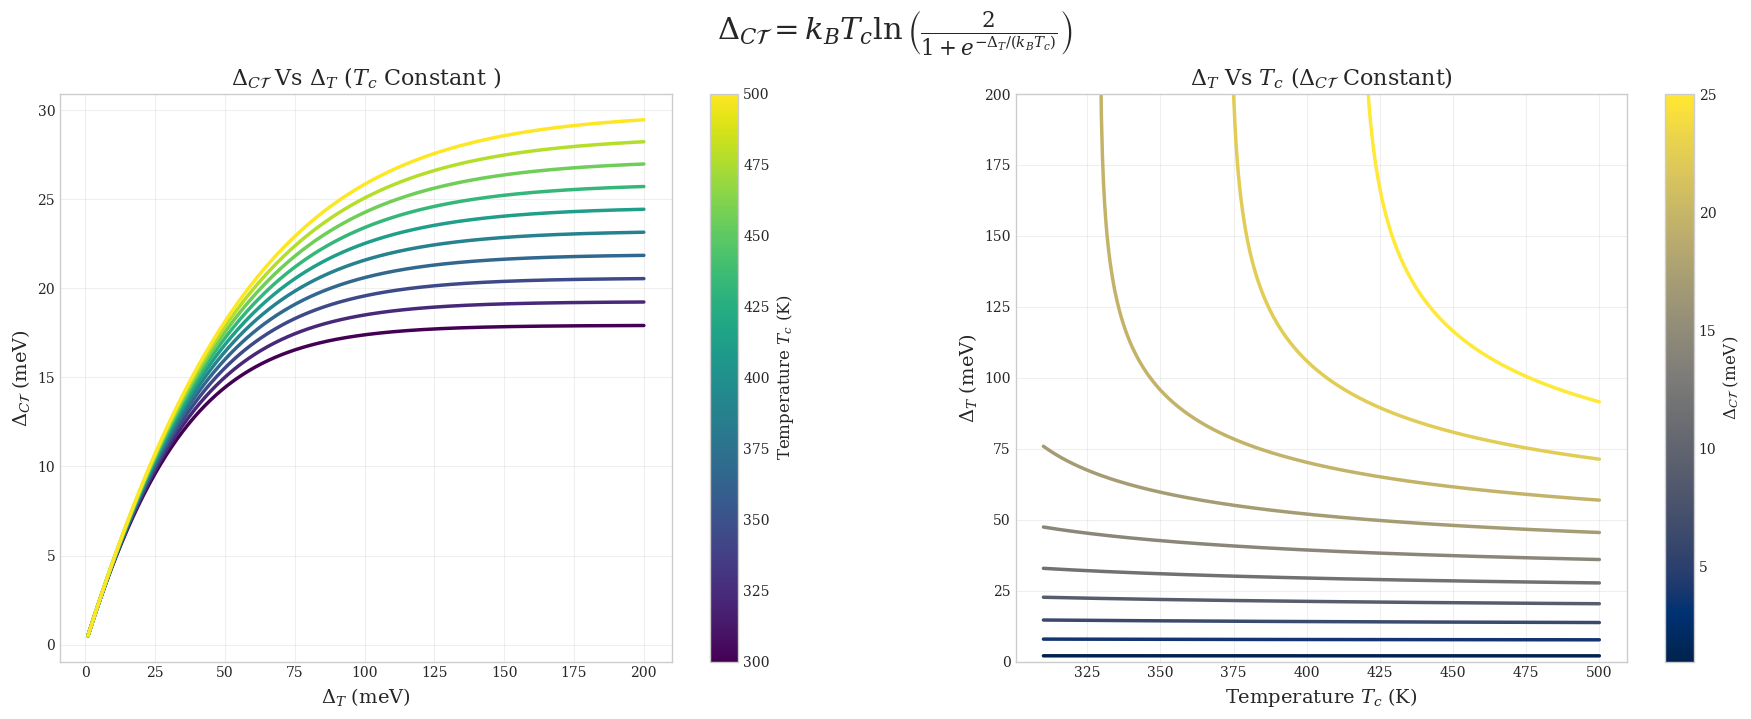

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import fsolve

# Boltzmann constant in eV/K
kB = 8.617333262145e-5  # eV/K

def delta_ct(T_c, delta_T):
    """
    Calculate Δ_C𝒯 = k_B T_c * ln(2 / (1 + exp(-Δ_T/(k_B T_c)))
    """
    exponent = -delta_T / (kB * T_c)
    return kB * T_c * np.log(2 / (1 + np.exp(exponent)))

def delta_T_for_fixed_delta_ct(delta_ct_fixed, T_c):
    """
    Solve for Δ_T given fixed Δ_C𝒯 and T_c
    Implements: Δ_T = -k_B T_c * ln(2 * exp(-Δ_C𝒯/(k_B T_c)) - 1)
    """
    ratio = delta_ct_fixed / (kB * T_c)
    inner = 2 * np.exp(-ratio) - 1
    # Handle cases where inner <= 0 (no physical solution)
    return np.where(inner > 0, -kB * T_c * np.log(inner), np.nan)

# Configure plot aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12

# Create figure with 3 subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(18, 7))

# =================================================================
# Plot 1: Fixed T_c values (vary Δ_T)
# =================================================================
delta_T_range = np.linspace(0.001, 0.2, 500)  # Δ_T in eV (0.001 to 0.2 eV)
T_c_values = np.linspace(300, 500, 10)        # 10 T_c values from 300K to 500K

cmap1 = plt.get_cmap('viridis')
colors1 = cmap1(np.linspace(0, 1, len(T_c_values)))

for i, T_c in enumerate(T_c_values):
    delta_ct_values = delta_ct(T_c, delta_T_range)
    ax1.plot(delta_T_range * 1000, delta_ct_values * 1000, lw=2.5, 
             color=colors1[i], label=f'T_c = {T_c:.0f} K')

ax1.set_title(r'$\Delta_{C\mathcal{T}}$ Vs $\Delta_T$ ($T_c$ Constant )', fontsize=16)
ax1.set_xlabel(r'$\Delta_T$ (meV)', fontsize=14)
ax1.set_ylabel(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add colorbar for temperature
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=plt.Normalize(vmin=min(T_c_values), vmax=max(T_c_values)))
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1)
cbar1.set_label('Temperature $T_c$ (K)', fontsize=12)



# =================================================================
# Plot 3: Fixed Δ_C𝒯 values (vary T_c and show Δ_T)
# =================================================================
T_c_range3 = np.linspace(310, 500, 500)  # Start above 300K for numerical stability
delta_ct_values = np.linspace(1, 25, 10)  # 10 Δ_C𝒯 values in meV (1-25 meV)

cmap3 = plt.get_cmap('cividis')
colors3 = cmap3(np.linspace(0, 1, len(delta_ct_values)))

for i, delta_ct_fixed in enumerate(delta_ct_values):
    # Convert to eV for calculations
    delta_ct_fixed_ev = delta_ct_fixed / 1000
    # Calculate Δ_T for each T_c
    delta_T_results = delta_T_for_fixed_delta_ct(delta_ct_fixed_ev, T_c_range3) * 1000  # to meV
    
    # Only plot valid results (where solution exists)
    valid_mask = ~np.isnan(delta_T_results)
    ax3.plot(T_c_range3[valid_mask], delta_T_results[valid_mask], lw=2.5,
             color=colors3[i], label=f'Δ_C𝒯 = {delta_ct_fixed:.0f} meV')

ax3.set_title(r'$\Delta_T$ Vs $T_c$ ($\Delta_{C\mathcal{T}}$ Constant)', fontsize=16)
ax3.set_xlabel(r'Temperature $T_c$ (K)', fontsize=14)
ax3.set_ylabel(r'$\Delta_T$ (meV)', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 200)  # Limit y-axis for better visibility

# Add colorbar for Δ_C𝒯
sm3 = plt.cm.ScalarMappable(cmap=cmap3, norm=plt.Normalize(vmin=min(delta_ct_values), 
                           vmax=max(delta_ct_values)))
sm3.set_array([])
cbar3 = fig.colorbar(sm3, ax=ax3)
cbar3.set_label(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=12)

# =================================================================
# Final formatting
# =================================================================
plt.suptitle(r'$\Delta_{C\mathcal{T}} = k_B T_c \ln \left( \frac{2}{1 + e^{-\Delta_T/(k_B T_c)}} \right)$', 
             fontsize=22, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.25)
plt.savefig('delta_ct_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/dl/nx346nrn0bzg0hckhk0bl54m0000gn/T/ipykernel_48164/963373009.py:23: RuntimeWarning: invalid value encountered in log
  return np.where(inner > 0, -kB * T_c * np.log(inner), np.nan)


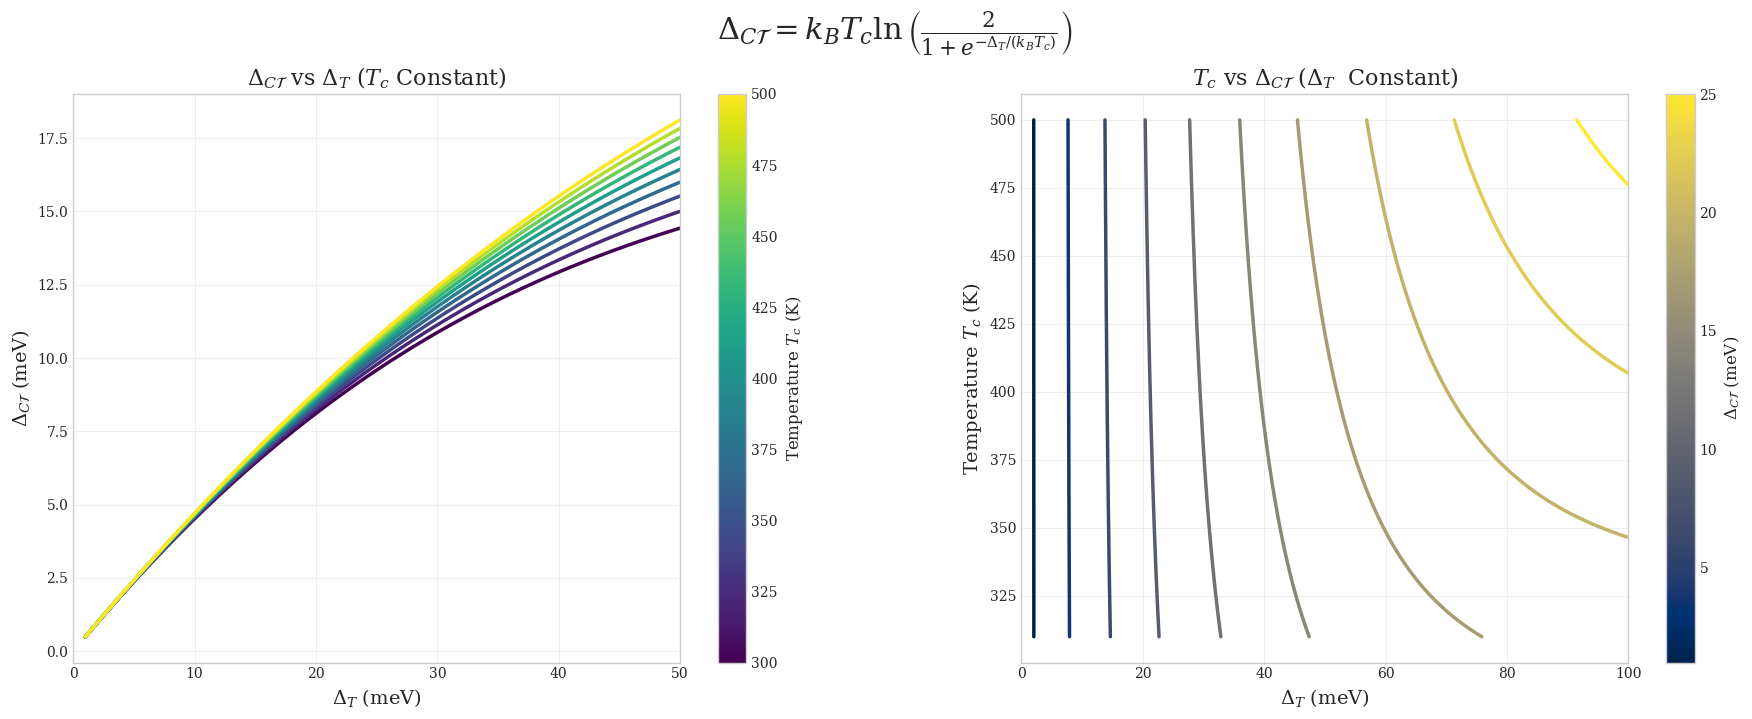

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Boltzmann constant in eV/K
kB = 8.617333262145e-5  # eV/K

def delta_ct(T_c, delta_T):
    """
    Calculate Δ_C𝒯 = k_B T_c * ln(2 / (1 + exp(-Δ_T/(k_B T_c)))
    """
    exponent = -delta_T / (kB * T_c)
    return kB * T_c * np.log(2 / (1 + np.exp(exponent)))

def delta_T_for_fixed_delta_ct(delta_ct_fixed, T_c):
    """
    Solve for Δ_T given fixed Δ_C𝒯 and T_c
    Implements: Δ_T = -k_B T_c * ln(2 * exp(-Δ_C𝒯/(k_B T_c)) - 1)
    """
    ratio = delta_ct_fixed / (kB * T_c)
    inner = 2 * np.exp(-ratio) - 1
    # Handle cases where inner <= 0 (no physical solution)
    return np.where(inner > 0, -kB * T_c * np.log(inner), np.nan)

# Configure plot aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# =================================================================
# Plot 1: Fixed T_c values (vary Δ_T) - SMALLER RANGE
# =================================================================
# Reduced range: 0.001-0.05 eV → 1-50 meV (instead of 1-200 meV)
delta_T_range = np.linspace(0.001, 0.05, 500)  # Δ_T in eV
T_c_values = np.linspace(300, 500, 10)         # T_c in K

cmap1 = plt.get_cmap('viridis')
colors1 = cmap1(np.linspace(0, 1, len(T_c_values)))

for i, T_c in enumerate(T_c_values):
    delta_ct_values = delta_ct(T_c, delta_T_range)
    ax1.plot(delta_T_range * 1000, delta_ct_values * 1000, lw=2.5, 
             color=colors1[i], label=f'T_c = {T_c:.0f} K')

ax1.set_title(r'$\Delta_{C\mathcal{T}}$ vs $\Delta_T$ ($T_c$ Constant)', fontsize=16)
ax1.set_xlabel(r'$\Delta_T$ (meV)', fontsize=14)
ax1.set_ylabel(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 50)  # Set x-axis limit to 0-50 meV

# Add colorbar for temperature
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=plt.Normalize(vmin=min(T_c_values), vmax=max(T_c_values)))
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1)
cbar1.set_label('Temperature $T_c$ (K)', fontsize=12)

# =================================================================
# Plot 2: Fixed Δ_C𝒯 values (Δ_T vs T_c) - CHANGED TO Δ_T vs T_c
# =================================================================
T_c_range = np.linspace(310, 500, 500)  # T_c in K
delta_ct_values = np.linspace(1, 25, 10)  # Δ_C𝒯 in meV

cmap2 = plt.get_cmap('cividis')
colors2 = cmap2(np.linspace(0, 1, len(delta_ct_values)))

for i, delta_ct_fixed in enumerate(delta_ct_values):
    # Convert to eV for calculations
    delta_ct_fixed_ev = delta_ct_fixed / 1000
    # Calculate Δ_T for each T_c
    delta_T_results = delta_T_for_fixed_delta_ct(delta_ct_fixed_ev, T_c_range) * 1000  # to meV
    
    # Only plot valid results (where solution exists)
    valid_mask = ~np.isnan(delta_T_results)
    
    # PLOT Δ_T vs T_c (swap axes)
    ax2.plot(delta_T_results[valid_mask], T_c_range[valid_mask], lw=2.5,
             color=colors2[i], label=f'Δ_C𝒯 = {delta_ct_fixed:.0f} meV')

ax2.set_title(r'$T_c$ vs $\Delta_{C\mathcal{T}}$ ($\Delta_T$ Constant)', fontsize=16)
ax2.set_xlabel(r'$\Delta_T$ (meV)', fontsize=14)  # Δ_T on x-axis
ax2.set_ylabel(r'Temperature $T_c$ (K)', fontsize=14)  # T_c on y-axis
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 100)  # Set x-axis limit to 0-100 meV

# Add colorbar for Δ_C𝒯
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=plt.Normalize(vmin=min(delta_ct_values), 
                           vmax=max(delta_ct_values)))
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2)
cbar2.set_label(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=12)

# =================================================================
# Final formatting
# =================================================================
plt.suptitle(r'$\Delta_{C\mathcal{T}} = k_B T_c \ln \left( \frac{2}{1 + e^{-\Delta_T/(k_B T_c)}} \right)$', 
             fontsize=22, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.25)
plt.savefig('delta_ct_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

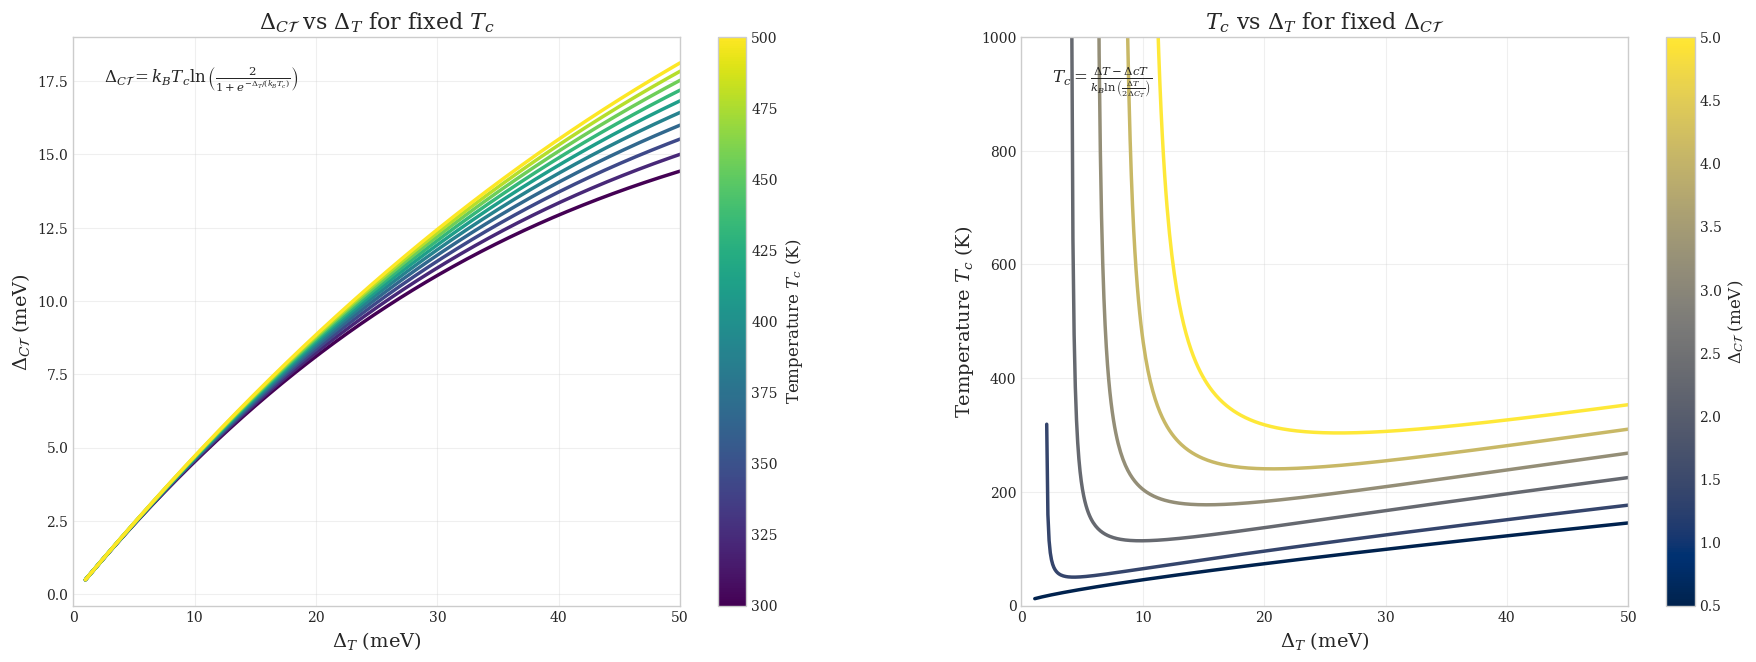

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Boltzmann constant in eV/K
kB = 8.617333262145e-5  # eV/K

def delta_ct(T_c, delta_T):
    """
    Calculate Δ_C𝒯 = k_B T_c * ln(2 / (1 + exp(-Δ_T/(k_B T_c)))
    """
    exponent = -delta_T / (kB * T_c)
    return kB * T_c * np.log(2 / (1 + np.exp(exponent)))

def T_c_func(delta_T, delta_CT, delta_c_T=0.001):
    """
    Calculate T_c = (ΔT - Δc T) / (k_B * ln(ΔT / (2 ΔC_T)))
    """
    numerator = delta_T - delta_c_T
    with np.errstate(divide='ignore', invalid='ignore'):
        denominator = kB * np.log(delta_T / (2 * delta_CT))
        T_c = numerator / denominator
    return T_c

# Configure plot aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# First subplot: Δ_C𝒯 vs Δ_T for fixed T_c
delta_T_range = np.linspace(0.001, 0.05, 500)  # Δ_T in eV
T_c_values = np.linspace(300, 500, 10)         # T_c in K

cmap1 = plt.get_cmap('viridis')
colors1 = cmap1(np.linspace(0, 1, len(T_c_values)))

for i, T_c in enumerate(T_c_values):
    delta_ct_values = delta_ct(T_c, delta_T_range)
    ax1.plot(delta_T_range * 1000, delta_ct_values * 1000, lw=2.5, 
             color=colors1[i], label=f'T_c = {T_c:.0f} K')

ax1.set_title(r'$\Delta_{C\mathcal{T}}$ vs $\Delta_T$ for fixed $T_c$', fontsize=16)
ax1.set_xlabel(r'$\Delta_T$ (meV)', fontsize=14)
ax1.set_ylabel(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 50)
# Add first subplot equation
ax1.text(0.05, 0.95, r'$\Delta_{C\mathcal{T}} = k_B T_c \ln \left( \frac{2}{1 + e^{-\Delta_T/(k_B T_c)}} \right)$', 
         transform=ax1.transAxes, fontsize=12, verticalalignment='top')

sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=plt.Normalize(vmin=min(T_c_values), vmax=max(T_c_values)))
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1)
cbar1.set_label('Temperature $T_c$ (K)', fontsize=12)

# Second subplot: T_c vs Δ_T for fixed Δ_C𝒯
delta_T_range = np.linspace(0.001, 0.05, 500)  # Δ_T in eV
delta_c_T = 0.001  # Δc T fixed at 0.001 eV
delta_CT_values = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005])  # Δ_C𝒯 in eV

cmap2 = plt.get_cmap('cividis')
colors2 = cmap2(np.linspace(0, 1, len(delta_CT_values)))

for i, delta_CT in enumerate(delta_CT_values):
    T_c_values = T_c_func(delta_T_range, delta_CT, delta_c_T=delta_c_T)
    valid_mask = (T_c_values > 0) & ~np.isnan(T_c_values) & ~np.isinf(T_c_values)
    label = f'Δ_C𝒯 = {delta_CT*1000:.1f} meV'
    if delta_CT == 0.0005:  # Highlight Δ_C𝒯 = 0.5 × Δc T
        label += ' (Δ_C𝒯 = 0.5 Δc T)'
    ax2.plot(delta_T_range[valid_mask] * 1000, T_c_values[valid_mask], lw=2.5,
             color=colors2[i], label=label)

ax2.set_title(r'$T_c$ vs $\Delta_T$ for fixed $\Delta_{C\mathcal{T}}$', fontsize=16)
ax2.set_xlabel(r'$\Delta_T$ (meV)', fontsize=14)
ax2.set_ylabel(r'Temperature $T_c$ (K)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 1000)
# Add second subplot equation
ax2.text(0.05, 0.95, r'$T_c = \frac{\Delta T - \Delta c T}{k_B \ln \left( \frac{\Delta T}{2 \Delta C_T} \right)}$', 
         transform=ax2.transAxes, fontsize=12, verticalalignment='top')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=plt.Normalize(vmin=min(delta_CT_values)*1000, 
                           vmax=max(delta_CT_values)*1000))
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2)
cbar2.set_label(r'$\Delta_{C\mathcal{T}}$ (meV)', fontsize=12)

# Final formatting
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.25)
plt.savefig('Tc_vs_delta_T_updated.png', dpi=300, bbox_inches='tight')
plt.show()